<a href="https://colab.research.google.com/github/karthikeya953/YBI-Intership-Project-1/blob/main/Milage_prediction_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [8]:
import numpy as np

In [9]:
import matplotlib.pyplot as plt

In [10]:
import seaborn as sns

In [11]:
df=pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/MPG.csv')

In [12]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [13]:
df.nunique()

mpg             129
cylinders         5
displacement     82
horsepower       93
weight          351
acceleration     95
model_year       13
origin            3
name            305
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [15]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [16]:
df.corr()

<ipython-input-16-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000


In [17]:
df=df.dropna()

In [19]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


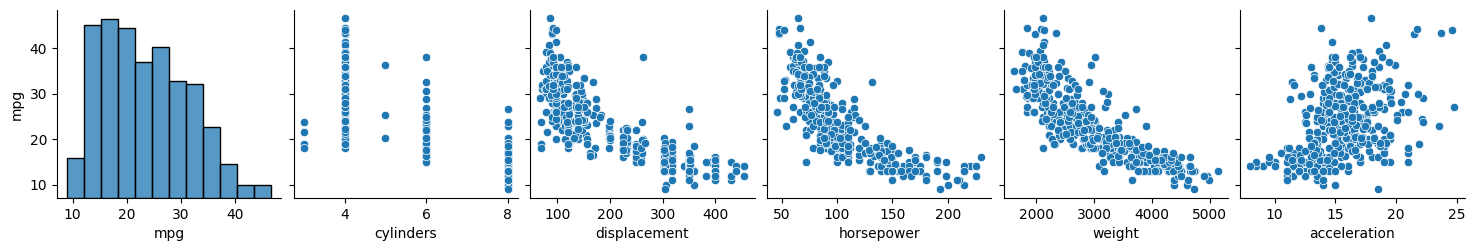

In [20]:
sns.pairplot(df,x_vars=['mpg', 'cylinders', 'displacement', 'horsepower', 'weight','acceleration'],y_vars=['mpg']);

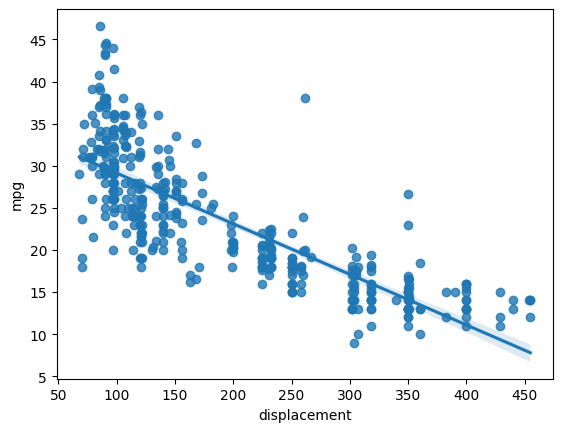

In [21]:
sns.regplot(x='displacement',y='mpg',data=df);

In [22]:
y=df['mpg']

In [23]:
y.shape

(392,)

In [24]:
x=df[['cylinders', 'displacement', 'horsepower', 'weight','acceleration']]

In [25]:
x.shape

(392, 5)

In [26]:
x

,cylinders,displacement,horsepower,weight,acceleration
0,8,307.0,130.0,3504,12.0
1,8,350.0,165.0,3693,11.5
2,8,318.0,150.0,3436,11.0
3,8,304.0,150.0,3433,12.0
4,8,302.0,140.0,3449,10.5
...,...,...,...,...,...
393,4,140.0,86.0,2790,15.6
394,4,97.0,52.0,2130,24.6
395,4,135.0,84.0,2295,11.6
396,4,120.0,79.0,2625,18.6


In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
ss=StandardScaler()

In [29]:
x=ss.fit_transform(x)

In [30]:
x

array([[ 1.48394702,  1.07728956,  0.66413273,  0.62054034, -1.285258  ],
       [ 1.48394702,  1.48873169,  1.57459447,  0.84333403, -1.46672362],
       [ 1.48394702,  1.1825422 ,  1.18439658,  0.54038176, -1.64818924],
       ...,
       [-0.86401356, -0.56847897, -0.53247413, -0.80463202, -1.4304305 ],
       [-0.86401356, -0.7120053 , -0.66254009, -0.41562716,  1.11008813],
       [-0.86401356, -0.72157372, -0.58450051, -0.30364091,  1.40043312]])

In [31]:
pd.DataFrame(x).describe()

,0,1,2,3,4
count,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02
mean,-1.087565e-16,-7.250436e-17,-1.812609e-16,-1.812609e-17,4.350262e-16
std,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00
min,-1.451004e+00,-1.209563e+00,-1.520975e+00,-1.608575e+00,-2.736983e+00
25%,-8.640136e-01,-8.555316e-01,-7.665929e-01,-8.868535e-01,-6.410551e-01
50%,-8.640136e-01,-4.153842e-01,-2.853488e-01,-2.052109e-01,-1.499869e-02
75%,1.483947e+00,7.782764e-01,5.600800e-01,7.510927e-01,5.384714e-01
max,1.483947e+00,2.493416e+00,3.265452e+00,2.549061e+00,3.360262e+00


In [32]:
from sklearn.model_selection import train_test_split

In [33]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=2529)

In [34]:
from sklearn.linear_model import LinearRegression

In [36]:
lr=LinearRegression()

In [40]:
lr.fit(x_train,y_train)

LinearRegression()

In [41]:
lr.intercept_

23.483119062548774

In [42]:
lr.coef_

array([-0.35497889, -0.72786075, -1.72722268, -4.06315907, -0.11739853])

In [43]:
y_pred=lr.predict(x_test)

In [44]:
y_pred

array([18.32188513, 15.07674476, 14.2786736 , 23.84523302, 29.74116781,
       23.61299365, 26.6604164 , 24.46783411, 15.04212531, 11.95308088,
       24.25372129, 28.07411938, 31.63490339, 30.93988651, 18.43235175,
       19.44254741, 28.22061918, 32.11171626, 31.11544944, 27.27148308,
       18.65466059, 22.57755904, 26.0601641 , 32.35662813, 20.76368181,
        9.02944902, 21.97420161, 18.04774444, 25.08448615, 15.44280714,
       23.15922382, 16.9712044 ,  9.68627277, 29.96903621, 20.50731645,
       29.14329752, 24.4893792 , 21.74336671, 10.65587765, 13.0945777 ,
       21.50535573, 19.75130296,  6.46747894, 17.61624751, 22.5812909 ,
       29.36165446, 13.43606562, 25.99802937, 29.37071374, 22.40845703,
       22.17384354, 16.45305352, 23.88538244, 30.11931398, 10.26098017,
        9.91322665, 28.20839534, 23.53578327, 20.18010875, 30.67336623,
       20.92795194, 26.88323696, 22.99716612, 14.13762824, 24.69571132,
       27.00688822, 15.25603124, 24.0361934 , 30.75582323, 14.84

In [45]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,r2_score

In [46]:
mean_absolute_error(y_test,y_pred)

3.3136728437528733

In [47]:
mean_absolute_percentage_error(y_test,y_pred)

0.14599249597765745

In [48]:
r2_score(y_test,y_pred)

0.7045205877824992

In [49]:
from sklearn.preprocessing import PolynomialFeatures

In [50]:
poly=PolynomialFeatures(degree=2,interaction_only=True,include_bias=False)

In [51]:
x_train2=poly.fit_transform(x_train)

In [52]:
x_test2=poly.fit_transform(x_test)

In [53]:
lr.fit(x_train2,y_train)

LinearRegression()

In [54]:
lr.intercept_

21.24849064841608

In [55]:
lr.coef_

array([ 1.09081413, -3.8824001 , -4.81122263, -1.50237   , -0.70540835,
       -1.8244117 ,  4.57171036, -0.56368904,  2.25902763, -0.13393934,
        1.96784036, -2.47835882, -1.17063048, -0.03309768,  0.83955559])

In [56]:
y_pred_poly=lr.predict(x_test2)

In [57]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,r2_score

In [58]:
mean_absolute_error(y_test,y_pred_poly)

2.8225797219813487

In [59]:
mean_absolute_percentage_error(y_test,y_pred_poly)

0.12479662542825379

In [60]:
r2_score(y_test,y_pred_poly)

0.7447462887466554